In [51]:
import matplotlib
matplotlib.rcParams["figure.dpi"] = 200

In [52]:
abs_path = "C:\\Dev\\Smart Car Project\\auton-car-nnetwork\\data\\"

import pandas as pd

df = pd.read_csv(abs_path + "output-Mi30-Ma150-O-9 - aug.csv")
df

,filename,angle
0,2021_01_26_12_05_00_542033_picture_000000576.jpg,0.000
1,2021_01_26_12_05_00_568081_picture_000000577.jpg,0.000
2,2021_01_26_12_05_00_646288_picture_000000580.jpg,0.000
3,2021_01_26_12_05_00_741925_picture_000000584.jpg,0.000
4,2021_01_26_12_05_00_816801_picture_000000587.jpg,0.000
...,...,...
14051,m-2021_01_26_12_08_35_460327_picture_000009021...,-0.200
14052,m-2021_01_26_12_08_35_486787_picture_000009022...,-0.150
14053,m-2021_01_26_12_08_35_510710_picture_000009023...,-0.100
14054,m-2021_01_26_12_08_35_536385_picture_000009024...,-0.083


In [53]:
norm_uni = df['angle'].unique()
norm_uni.sort()
norm_uni

array([-1.   , -0.983, -0.967, -0.95 , -0.933, -0.917, -0.9  , -0.883,
       -0.867, -0.85 , -0.833, -0.817, -0.8  , -0.783, -0.767, -0.75 ,
       -0.733, -0.717, -0.7  , -0.683, -0.667, -0.65 , -0.633, -0.617,
       -0.6  , -0.583, -0.567, -0.55 , -0.533, -0.517, -0.5  , -0.483,
       -0.467, -0.45 , -0.433, -0.417, -0.4  , -0.383, -0.367, -0.35 ,
       -0.333, -0.317, -0.3  , -0.283, -0.267, -0.25 , -0.233, -0.217,
       -0.2  , -0.183, -0.167, -0.15 , -0.133, -0.117, -0.1  , -0.083,
       -0.067, -0.05 , -0.033, -0.017,  0.   ,  0.017,  0.033,  0.05 ,
        0.067,  0.083,  0.1  ,  0.117,  0.133,  0.15 ,  0.167,  0.183,
        0.2  ,  0.217,  0.233,  0.25 ,  0.267,  0.283,  0.3  ,  0.317,
        0.333,  0.35 ,  0.367,  0.383,  0.4  ,  0.417,  0.433,  0.45 ,
        0.467,  0.483,  0.5  ,  0.517,  0.533,  0.55 ,  0.567,  0.583,
        0.6  ,  0.617,  0.633,  0.65 ,  0.667,  0.683,  0.7  ,  0.717,
        0.733,  0.75 ,  0.767,  0.783,  0.8  ,  0.817,  0.833,  0.85 ,
      

In [54]:
orig_uni = (((norm_uni / 2) + 0.5) * 120) + 30
orig_uni.sort()
orig_uni

array([ 30.  ,  31.02,  31.98,  33.  ,  34.02,  34.98,  36.  ,  37.02,
        37.98,  39.  ,  40.02,  40.98,  42.  ,  43.02,  43.98,  45.  ,
        46.02,  46.98,  48.  ,  49.02,  49.98,  51.  ,  52.02,  52.98,
        54.  ,  55.02,  55.98,  57.  ,  58.02,  58.98,  60.  ,  61.02,
        61.98,  63.  ,  64.02,  64.98,  66.  ,  67.02,  67.98,  69.  ,
        70.02,  70.98,  72.  ,  73.02,  73.98,  75.  ,  76.02,  76.98,
        78.  ,  79.02,  79.98,  81.  ,  82.02,  82.98,  84.  ,  85.02,
        85.98,  87.  ,  88.02,  88.98,  90.  ,  91.02,  91.98,  93.  ,
        94.02,  94.98,  96.  ,  97.02,  97.98,  99.  , 100.02, 100.98,
       102.  , 103.02, 103.98, 105.  , 106.02, 106.98, 108.  , 109.02,
       109.98, 111.  , 112.02, 112.98, 114.  , 115.02, 115.98, 117.  ,
       118.02, 118.98, 120.  , 121.02, 121.98, 123.  , 124.02, 124.98,
       126.  , 127.02, 127.98, 129.  , 130.02, 130.98, 132.  , 133.02,
       133.98, 135.  , 136.02, 136.98, 138.  , 139.02, 139.98, 141.  ,
      

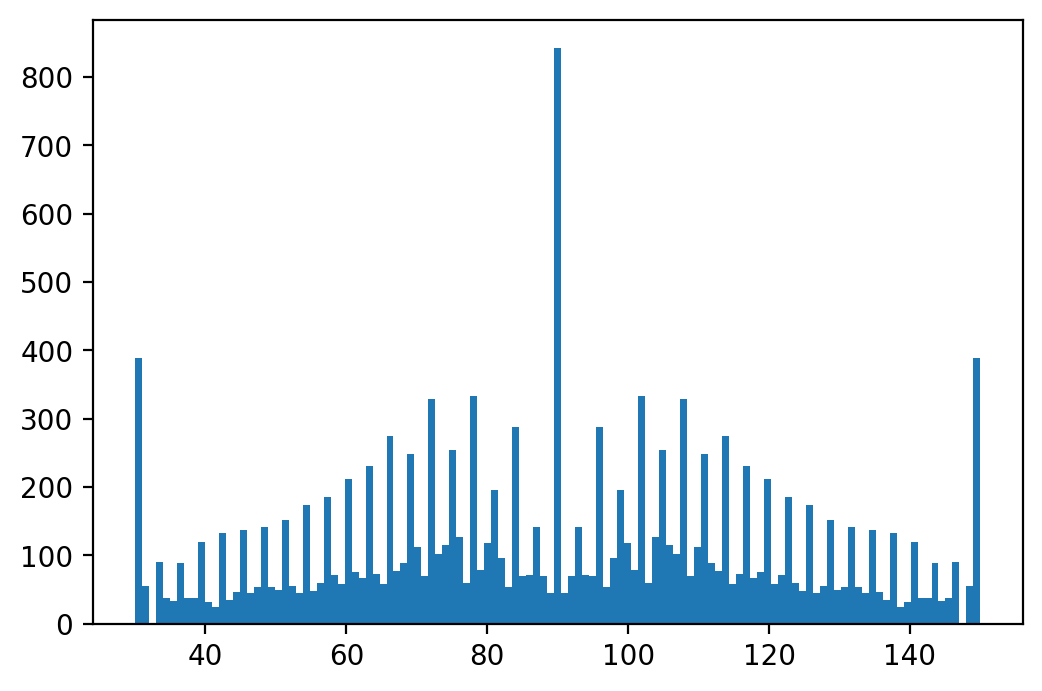

In [55]:
import matplotlib.pyplot as plt

df_alt = (((df['angle'] / 2) + 0.5) * 120) + 30
df_alt.hist(grid=False ,bins=df_alt.nunique())
plt.show()